# Pockerface sample instruction
\begin{json}
{
 "path1":"E:\\Project\\Face\\Test3\\test1-10\\身份证1-10",       #sample dir 1.
 "files1":[                                      #sample array 1.
  {
   "id":0,                                      #sample id.
   "name":"13040219340601091X.jpg",                     #source file name.
   "exist":1,                                    #exist face num.
   "mean":0.656867,                                #mean of gray image.
   "std":0.303755,                                 #std of gray image.
   "score":31.9567,                                #score if image is face,>2 is face.
   "box":[21,29,62,62],                             #box of face in image.
   "roll_yaw_pitch":[2.54068e-319,4.39681e-312,0],           #invalid. 
   "marks":[[40.7615,52.3138],[65.708,51.2915],[54.6259,67.8988],[45.3339,82.1558],[64.1221,81.446]],
                                             #locate of left/right eye nose left/right mouse. 
   "face":"corp\\13040219340601091X.jpg",                 #face rected image
   "feas":[]                                     #feature vector
  },
  {
   "id":1,
   "name":"13040219340618002X.jpg",
   "exist":0,
   "mean":0.338139,
   "std":0.0952714,
   "score":-1,
   "box":[-1,-1,-1,-1],
   "roll_yaw_pitch":[0,0,0],
   "marks":[[-1,-1],[-1,-1],[-1,-1],[-1,-1],[-1,-1]],
   "face":"corp\\13040219340618002X.jpg",
   "feas":[]
  }
 ],
 "path2":"E:\\Project\\Face\\Test3\\test1-10\\现场照片1-10",     #sample dir 2.
 "files2":[...],                                  #sample array 2,same size as "files1"
 "compare_matrix":[                                #compare value of cosin dist of feature vector in files1/feas and files2/feas 
  [0.187393,0.332662],
  [-1,-1]]
}
\end{json}

In [1]:
## Load data
# files1/feas into feas1, files2/feas into feas2, compare_matrix into real_matrix, diag matrix as label_matrix
import json
import numpy as np

file = 'Test.json'
fp = open(file, 'r')
str = fp.read()
data = json.loads(str)
fp.close()
samplenum = 0
for index,file in enumerate(data['files2']):
    if(file['exist']==1):
        samplenum=samplenum+1
feas1 = np.zeros([samplenum,len(data['files1'][0]['feas'])], dtype=float)
feas2 = np.zeros([samplenum,len(data['files2'][0]['feas'])], dtype=float)
i=0
for index,file in enumerate(data['files2']):
    if(file['exist']==1):
        feas1[i,:]=data['files1'][index]['feas']
        feas2[i,:]=data['files2'][index]['feas']
        i=i+1

real_matrix=np.eye(len(feas1), dtype=float)
label_matrix=np.eye(len(feas1), dtype=float)

i=0
j=0
for index1,file1 in enumerate(data['files1']):
    j=0
    if(data['files1'][index1]['exist']==1 & data['files2'][index1]['exist']==1):
        for index2,file2 in enumerate(data['files2']):
            if(data['files2'][index2]['exist']==1 & data['files1'][index2]['exist']==1):
                real_matrix[i,j]=data['compare_matrix'][index1][index2]
                j=j+1
        i=i+1
print("Load data completed!")  

Load data completed!


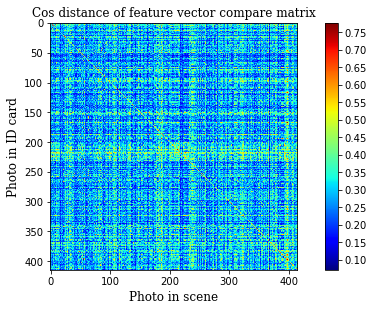

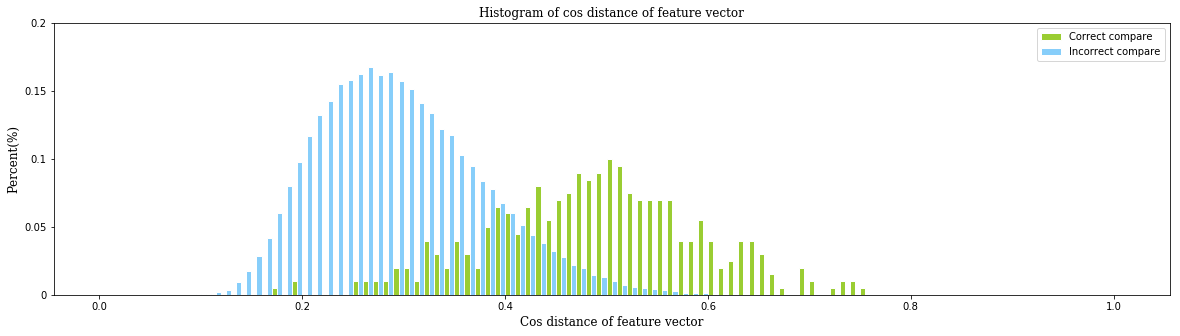

In [2]:
## Plot data
# Plot real_matrix as image in fig1, histogram in fig2, 
# fig1/2 show that the cosin distance of feature vector in files1/feas and files2/feas is unable to thershold same/unsame face.
import json
import numpy as np 
import matplotlib.pyplot as plt

#font
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 12}  

#image of cos distance compare matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
cmap = plt.cm.jet
gci = ax.imshow(real_matrix,cmap=cmap)
#colorbar  
cbar = plt.colorbar(gci)
cbar.set_ticks(np.linspace(0.0,1.0,21))
#axis
ax.set_ylabel('Photo in ID card',fontdict=font)  
ax.set_xlabel('Photo in scene',fontdict=font)
#title  
titleStr = 'Cos distance of feature vector compare matrix'  
plt.title(titleStr,fontdict=font)
plt.show() 

#histogram of cos distance compare matrix
tic_num=100
tic_min=0.0
tic_max=1.0
tic_range=tic_max-tic_min
tic_deg=tic_range/tic_num
tic_val=[]
tic_val_left=[]
tic_val_right=[]
for t in range(tic_num):
    tic_val.append(t*tic_deg+tic_deg)
    tic_val_left.append(t*tic_deg+tic_deg-tic_deg/4)
    tic_val_right.append(t*tic_deg+tic_deg+tic_deg/4)
    
def uneye_hist(matrix,tic_val):
    w = len(matrix[0])
    h = len(matrix)
    tic_hist=[0]*len(tic_val)
    n=0
    for i in range(h):
        for j in range(w):
            if(i!=j):
                for t,val in enumerate(tic_val):
                    n=n+1
                    if(matrix[i,j]<val):
                        tic_hist[t]=tic_hist[t]+1
                        break
    for t,val in enumerate(tic_hist):
        tic_hist[t]=tic_hist[t]/n
    return tic_hist

def eye_hist(matrix,tic_val):
    w = len(matrix[0])
    h = len(matrix)
    tic_hist=[0]*len(tic_val)
    n=0
    for i in range(h):
        for j in range(w):
            if(i==j):
                for t,val in enumerate(tic_val):
                    n=n+1
                    if(matrix[i,j]<val):
                        tic_hist[t]=tic_hist[t]+1
                        break
    for t,val in enumerate(tic_hist):
        tic_hist[t]=tic_hist[t]/n
    return tic_hist

uneye_hist = uneye_hist(real_matrix,tic_val)
eye_hist = eye_hist(real_matrix,tic_val)

#histogram
fig = plt.figure(figsize=(20, 5))
ax = fig.gca()
uneye_histogram = plt.bar(tic_val_left, uneye_hist,width = tic_deg/2, facecolor = 'lightskyblue', edgecolor = 'white')
eye_histogram = plt.bar(tic_val_right, eye_hist,width = tic_deg/2, facecolor = 'yellowgreen', edgecolor = 'white')
#legend
plt.legend([eye_histogram, uneye_histogram],['Correct compare', 'Incorrect compare'])
#axis
ax.set_ylabel('Percent(%)',fontdict=font) 
ax.set_yticks(np.linspace(0,0.002,5))
ax.set_yticklabels( ('0', '0.05', '0.1', '0.15', '0.2'))
ax.set_xlabel('Cos distance of feature vector',fontdict=font)
#title  
titleStr='Histogram of cos distance of feature vector'
plt.title(titleStr,fontdict=font)
plt.show() 

# Autoencoder Note：
Refrence:
[link](http://blog.csdn.net/xceman1997/article/details/9385393)
[link](http://blog.csdn.net/freeliao/article/details/17967263)
## 1. Use autoencoder to get sparse vector of face:
### Encode-decode use mean-quare cost function：
\begin{equation}accuracy = \|X - decoder(encoder(X))\|^2\end{equation}
\begin{equation}active = ... in link2\end{equation}
\begin{equation}coss = accuracy + active + \sum W_{en} + \sum b_{en} \end{equation}
\begin{equation}min(coss_{au1}(X))\end{equation}
then:
\begin{equation}min(coss_{au2}(H1))...H1=encoder(X)\end{equation}
## 2. Use 1/0 lable to fine tunning the cosin distance of the output sparse vector:
### Fine tunning use cross-entropy cost function：
\begin{equation}cosdist(\bf{a},\bf{b}) = \frac{\|\bf{a}-\bf{b}\|^2}{\|\bf{a}\|*\|\bf{b}\|}\end{equation}
\begin{equation}centropy(\bf{a},\bf{b}) = -\frac{1}{n}\sum\limits_{i=1}^n [a_{i}\ln b_{i}+(1-a_{i})\ln(1-b_{i})]\end{equation}
\begin{equation}min(coss_{compare} = centropy(lable,cosdist))\end{equation}
## or 2. Use 1/0 lable to fine tunning a perceptron to output the similar of compare:
### Fine tunning use mean-quare cost function：
\begin{equation}centropy(l,\hat{l}) = -[l\ln \hat{l}+(1-l)\ln(1-\hat{l})]\end{equation}
\begin{equation}min(coss_{compare} = centropy(lable,perceptron))\end{equation}

In [3]:
## Build net
import tensorflow as tf  
import numpy as np  
import matplotlib.pyplot as plt  

tf.reset_default_graph()
def add_layer(ly_name,active_func,insize,outsize,dropout):
    with tf.name_scope(ly_name):
        with tf.name_scope('W'):
            W = tf.Variable(tf.random_normal([insize,outsize]))   
            W_summary = tf.summary.histogram(ly_name+"/W",W)   
        with tf.name_scope('b'):
            b = tf.Variable(tf.zeros([1,outsize]))   
            b_summary = tf.summary.histogram(ly_name+"/b",b)   
        #with tf.name_scope('Wxb'):
        def out(X_in):
            Wxb = tf.matmul(X_in,W)+b
            #Wxb_summary = tf.summary.histogram(ly_name+"/Wxb",Wxb)   
            Wxb_drop = tf.nn.dropout(Wxb, dropout)
            return active_func(Wxb_drop)
            #out_summary = tf.summary.histogram(ly_name+"/out",out)   
    return [out,W,b,W_summary,b_summary]

learning_rate = 0.01
batch_size = 100  
display_step = 1 
n_input = 2048
n_encoder_1 = 1024
n_encoder_2 = 512
n_perceptron = 1
#n_compare = 512
lamda_en_1 = 0.5
lamda_en_2 = 0.5
lamda_cmp = 0.5
lamda_pe = 0.5
beta_en_1 = 0.5
beta_en_2 = 0.5
beta_cmp = 0.5
#beta_pe = 0.5
X = tf.placeholder("float", [None, n_input],name='X')
Y = tf.placeholder("float", [None, n_input],name='Y')
H1 = tf.placeholder("float", [None, n_encoder_1],name='H1')
H2 = tf.placeholder("float", [None, n_encoder_2],name='H2')
H2_X = tf.placeholder("float", [None, n_encoder_2],name='H2_X')
H2_Y = tf.placeholder("float", [None, n_encoder_2],name='H2_Y')
L = tf.placeholder("float", [None, 1],name='L')
drop_en_1 = tf.placeholder("float")
sparse_en_1 = tf.placeholder("float")
drop_de_1 = tf.placeholder("float")
drop_en_2 = tf.placeholder("float")
sparse_en_2 = tf.placeholder("float")
drop_de_2 = tf.placeholder("float")
#drop_pe = tf.placeholder("float")
#sparse_pe = tf.placeholder("float")

with tf.name_scope('autoencoder_1'):
    [ly_en_1,W_en_1,b_en_1,W_en_1_summary,b_en_1_summary]=add_layer('ly_en_1',tf.nn.sigmoid,n_input,n_encoder_1,drop_en_1)
    [ly_de_1,W_de_1,b_de_1,W_de_1_summary,b_de_1_summary]=add_layer('ly_de_1',tf.nn.sigmoid,n_encoder_1,n_input,drop_de_1)
    with tf.name_scope('active'):
        active_au_1_i = 0.5*tf.reduce_mean(tf.pow(ly_en_1(X), 2),0)
        active_au_1 = tf.reduce_mean(tf.multiply(sparse_en_1,tf.log(sparse_en_1/active_au_1_i))\
                                     +tf.multiply(1-sparse_en_1,tf.log((1-sparse_en_1)/(1-active_au_1_i))))
        active_au_1_summary = tf.summary.scalar('autoencoder_1/active',active_au_1)
    with tf.name_scope('accuracy'):
        accuracy_au_1 = 0.5*tf.reduce_mean(tf.pow(X - ly_de_1(ly_en_1(X)), 2))
        accuracy_au_1_summary = tf.summary.scalar('autoencoder_1/accuracy',accuracy_au_1)
    with tf.name_scope('cost'):
        cost_au_1 = accuracy_au_1 + beta_en_1*active_au_1\
            + 0.5*lamda_en_1*tf.reduce_mean(tf.pow(W_en_1, 2)) + 0.5*lamda_en_1*tf.reduce_mean(tf.pow(b_en_1, 2))
        cost_au_1_summary = tf.summary.scalar('autoencoder_1/cost',cost_au_1)
    with tf.name_scope('optimizer'):
        optimizer_au_1 = tf.train.AdamOptimizer(learning_rate).minimize(cost_au_1) 

with tf.name_scope('autoencoder_2'):
    [ly_en_2,W_en_2,b_en_2,W_en_2_summary,b_en_2_summary]=add_layer('ly_en_2',tf.nn.sigmoid,n_encoder_1,n_encoder_2,drop_en_2)
    [ly_de_2,W_de_2,b_de_2,W_de_2_summary,b_de_2_summary]=add_layer('ly_de_2',tf.nn.sigmoid,n_encoder_2,n_encoder_1,drop_de_2)
    with tf.name_scope('active'):
        active_au_2_i = 0.5*tf.reduce_mean(tf.pow(ly_en_2(H1), 2),0)
        active_au_2 = tf.reduce_mean(tf.multiply(sparse_en_2,tf.log(sparse_en_2/active_au_2_i))\
                                     +tf.multiply(1-sparse_en_2,tf.log((1-sparse_en_2)/(1-active_au_2_i))))
        active_au_2_summary = tf.summary.scalar('autoencoder_2/active',active_au_2)
    with tf.name_scope('accuracy'):
        accuracy_au_2 = 0.5*tf.reduce_mean(tf.pow(H1 - ly_de_2(ly_en_2(H1)), 2))
        accuracy_au_2_summary = tf.summary.scalar('autoencoder_2/accuracy',accuracy_au_2)
    with tf.name_scope('cost'):
        cost_au_2 = accuracy_au_2 + beta_en_2*active_au_2\
            + 0.5*lamda_en_2*tf.reduce_mean(tf.pow(W_en_2, 2)) + 0.5*lamda_en_2*tf.reduce_mean(tf.pow(b_en_2, 2))
        cost_au_2_summary = tf.summary.scalar('autoencoder_2/cost',cost_au_2)
    with tf.name_scope('optimizer'):
        optimizer_au_2 = tf.train.AdamOptimizer(learning_rate).minimize(cost_au_2) 


def tf_euc_dist(vec1,vec2):
    return tf.reduce_mean(tf.pow(vec1 - vec2), 2)
def tf_cos_dist(vec1,vec2):
    return tf.reduce_mean(tf.multiply(vec1,vec2))/(tf.reduce_mean(tf.multiply(vec1,vec1))+tf.reduce_mean(tf.multiply(vec2,vec2)))
        
with tf.name_scope('compare'):
    with tf.name_scope('active'):
        active_au_1_cmp_i = 0.5*tf.reduce_mean(tf.pow(ly_en_1(X), 2),0)
        active_au_1_cmp = tf.reduce_mean(tf.multiply(sparse_en_1,tf.log(sparse_en_1/active_au_1_cmp_i))\
                                     +tf.multiply(1-sparse_en_1,tf.log((1-sparse_en_1)/(1-active_au_1_cmp_i))))
        active_au_2_cmp_i = 0.5*tf.reduce_mean(tf.pow(ly_en_2(ly_en_1(X)), 2),0)
        active_au_2_cmp = tf.reduce_mean(tf.multiply(sparse_en_2,tf.log(sparse_en_2/active_au_2_cmp_i))\
                                     +tf.multiply(1-sparse_en_2,tf.log((1-sparse_en_2)/(1-active_au_2_cmp_i))))
    with tf.name_scope('centropy'):
        cos_dist_XY = tf_cos_dist(ly_en_2(ly_en_1(X)),ly_en_2(ly_en_1(Y)))
        centropy_cmp = -1*tf.reduce_mean(tf.multiply(L,tf.log(cos_dist_XY))+tf.multiply((1-L),tf.log(1-cos_dist_XY)))
        centropy_cmp_summary = tf.summary.scalar('compare/centropy',centropy_cmp)
    with tf.name_scope('cost'):
        cost_cmp = centropy_cmp\
            + 0.5*beta_en_1*active_au_1_cmp + 0.5*beta_en_2*active_au_2_cmp#\
            #+ 0.25*lamda_en_1*tf.reduce_mean(tf.pow(W_en_1, 2)) + 0.25*lamda_en_1*tf.reduce_mean(tf.pow(b_en_1, 2))\
            #+ 0.25*lamda_en_2*tf.reduce_mean(tf.pow(W_en_2, 2)) + 0.25*lamda_en_2*tf.reduce_mean(tf.pow(b_en_2, 2))
        cost_cmp_summary = tf.summary.scalar('compare/cost',cost_cmp)
    with tf.name_scope('optimizer'):
        optimizer_cmp = tf.train.AdamOptimizer(learning_rate).minimize(cost_cmp)
        
with tf.name_scope('perceptron'):
    [ly_pe,W_pe,b_pe,W_pe_summary,b_pe_summary]=add_layer('ly_pe',tf.nn.tanh,n_encoder_2*2,n_perceptron,1.0)
    L_pe = ly_pe(tf.concat([ly_en_2(ly_en_1(X)),ly_en_2(ly_en_1(Y))],1))
    with tf.name_scope('active'):
        active_au_1_pe_i = 0.25*tf.reduce_mean(tf.pow(ly_en_1(X), 2),0)+0.25*tf.reduce_mean(tf.pow(ly_en_1(Y), 2),0)
        active_au_1_pe = tf.reduce_mean(tf.multiply(sparse_en_1,tf.log(sparse_en_1/active_au_1_pe_i))\
                                     +tf.multiply(1-sparse_en_1,tf.log((1-sparse_en_1)/(1-active_au_1_pe_i))))
        active_au_2_pe_i = 0.25*tf.reduce_mean(tf.pow(ly_en_2(ly_en_1(X)), 2),0)+0.25*tf.reduce_mean(tf.pow(ly_en_2(ly_en_1(Y)), 2),0)
        active_au_2_pe = tf.reduce_mean(tf.multiply(sparse_en_2,tf.log(sparse_en_2/active_au_2_pe_i))\
                                     +tf.multiply(1-sparse_en_2,tf.log((1-sparse_en_2)/(1-active_au_2_pe_i))))
    with tf.name_scope('accuracy'):
        accuracy_pe = 0.5*tf.reduce_mean(tf.pow(L - L_pe, 2))
        accuracy_pe_summary = tf.summary.scalar('perceptron/accuracy',accuracy_pe)
    with tf.name_scope('centropy'):
        centropy_pe = -1*tf.reduce_mean(tf.multiply(L,tf.log(L_pe)+tf.multiply((1-L),tf.log(1-L_pe))))
        centropy_pe_summary = tf.summary.scalar('perceptron/centropy',centropy_pe)
    with tf.name_scope('cost'):
        cost_pe = accuracy_pe\
            + 0.5*beta_en_1*active_au_1_pe + 0.5*beta_en_2*active_au_2_pe\
            + 0.25*lamda_en_1*tf.reduce_mean(tf.pow(W_en_1, 2)) + 0.25*lamda_en_1*tf.reduce_mean(tf.pow(b_en_1, 2))\
            + 0.25*lamda_en_2*tf.reduce_mean(tf.pow(W_en_2, 2)) + 0.25*lamda_en_2*tf.reduce_mean(tf.pow(b_en_2, 2))
        cost_pe_summary = tf.summary.scalar('perceptron/cost',cost_pe)
    with tf.name_scope('optimizer'):
        optimizer_cmp = tf.train.AdamOptimizer(learning_rate).minimize(cost_pe)

print("Build net completed!")   

Build net completed!


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

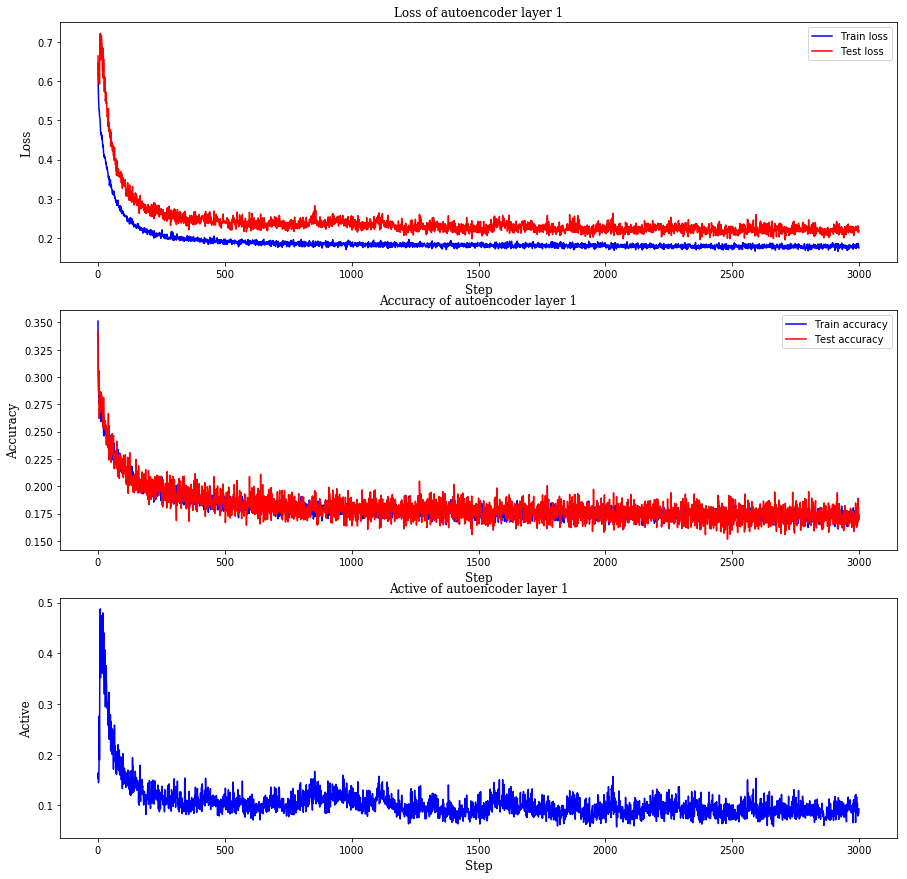

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

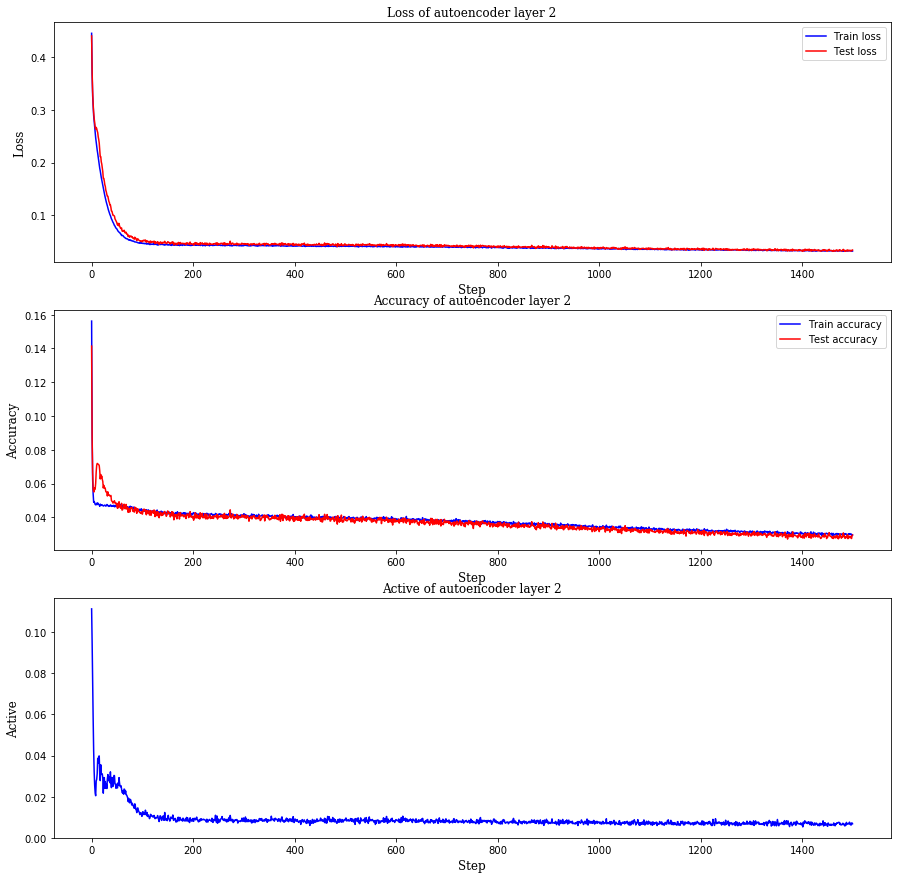

Optimization saved!


In [5]:
1. ## Use autoencoder to get sparse vector of face:
import tensorflow as tf  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as anm  
import os

epochs_au_1 = 3000
epochs_au_2 = 1500

def next_batch(num,fs1,fs2):
    permutation=np.random.permutation(len(fs1))
    permutation = permutation[:num]
    f1=fs1[permutation,:];
    f2=fs1[permutation,:];
    test_ratio = 0.25
    test_index = int(len(f1)*test_ratio)
    f1_train, f1_test = f1[0:len(f1)-test_index,:],  f1[len(f1)-test_index:,:]
    f2_train, f2_test = f2[0:len(f2)-test_index,:],  f2[len(f2)-test_index:,:]
    return f1_train, f1_test, f2_train, f2_test

encoder_1_feas_1 = np.zeros([samplenum,n_encoder_1], dtype=float)
encoder_1_feas_2 = np.zeros([samplenum,n_encoder_1], dtype=float)
encoder_2_feas_1 = np.zeros([samplenum,n_encoder_2], dtype=float)
encoder_2_feas_2 = np.zeros([samplenum,n_encoder_2], dtype=float)

loss_train_au_1=[]
loss_test_au_1=[]
loss_train_au_2=[]
loss_test_au_2=[]
accuracy_train_au_1=[]
accuracy_test_au_1=[]
accuracy_train_au_2=[]
accuracy_test_au_2=[]
active_test_au_1=[]
active_test_au_2=[]

sess = tf.InteractiveSession()
saver = tf.train.Saver()
if not os.path.exists('tmp/'):
    os.mkdir('tmp/')

merged1 = tf.summary.merge([cost_au_1_summary,accuracy_au_1_summary,W_en_1_summary,b_de_1_summary])
merged2 = tf.summary.merge([cost_au_2_summary,accuracy_au_2_summary,W_en_2_summary,b_de_2_summary])
merged_cmp = tf.summary.merge([cost_cmp_summary,centropy_cmp_summary,W_en_1_summary,b_de_1_summary,W_en_2_summary,b_de_2_summary])
writer = tf.summary.FileWriter("logs/",sess.graph) 

init = tf.global_variables_initializer() #不存在就初始化变量 
sess.run(init)
total_batch = int(len(feas1)/batch_size) #总批数
# train layer 1
for epoch in range(epochs_au_1):
    for i in range(total_batch):
        f1_train, f1_test, f2_train, f2_test = next_batch(batch_size,feas1,feas2)
        train_dict={X: np.vstack((f1_train,f2_train)),drop_en_1:0.7,sparse_en_1:0.05,drop_de_1:1.0}
        test_dict={X: np.vstack((f1_test,f2_test)),drop_en_1:1.0,sparse_en_1:0.05,drop_de_1:1.0}
        _, c_train_au_1,a_train_au_1 = sess.run([optimizer_au_1, cost_au_1, accuracy_au_1],train_dict)
    c_test_au_1,a_test_au_1,a_au_1 = sess.run([cost_au_1, accuracy_au_1, active_au_1],test_dict)
    print('|', end='')
    loss_train_au_1.append(c_train_au_1)
    loss_test_au_1.append(c_test_au_1)
    accuracy_train_au_1.append(a_train_au_1)
    accuracy_test_au_1.append(a_test_au_1)
    active_test_au_1.append(a_au_1)
    result = sess.run(merged1,test_dict)
    writer.add_summary(result,epoch)   
print("Optimization layer 1 finished!")

#image
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(311)
plot_train, = ax.plot(loss_train_au_1,'b-',label='train')
plot_test, = ax.plot(loss_test_au_1,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train loss', 'Test loss'])
#axis
ax.set_ylabel('Loss',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Loss of autoencoder layer 1'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(312)
plot_train, = ax.plot(accuracy_train_au_1,'b-',label='train')
plot_test, = ax.plot(accuracy_test_au_1,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train accuracy', 'Test accuracy'])
#axis
ax.set_ylabel('Accuracy',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Accuracy of autoencoder layer 1'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(313)
ax.plot(active_test_au_1,'b-')
#axis
ax.set_ylabel('Active',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
##title
titleStr='Active of autoencoder layer 1'
plt.title(titleStr,fontdict=font)
plt.show()

#prepare data
encoder_1_feas1 = sess.run(ly_en_1(X), feed_dict={X: feas1,drop_en_1:1.0})
encoder_1_feas2 = sess.run(ly_en_1(X), feed_dict={X: feas2,drop_en_1:1.0})
# train layer 2
for epoch in range(epochs_au_2):
    for i in range(total_batch):
        f1_train, f1_test, f2_train, f2_test = next_batch(batch_size,encoder_1_feas1,encoder_1_feas2)
        train_dict={H1: np.vstack((f1_train,f2_train)),drop_en_2:0.7,sparse_en_2:0.05,drop_de_2:1.0}
        test_dict={H1: np.vstack((f1_test,f2_test)),drop_en_2:1.0,sparse_en_2:0.05,drop_de_2:1.0}
        _, c_train_au_2,a_train_au_2 = sess.run([optimizer_au_2, cost_au_2, accuracy_au_2],train_dict)
    c_test_au_2,a_test_au_2,a_au_2 = sess.run([cost_au_2, accuracy_au_2,active_au_2],test_dict)
    print('|', end='')
    loss_train_au_2.append(c_train_au_2)
    loss_test_au_2.append(c_test_au_2)
    accuracy_train_au_2.append(a_train_au_2)
    accuracy_test_au_2.append(a_test_au_2)
    active_test_au_2.append(a_au_2)
    result = sess.run(merged2,test_dict)
    writer.add_summary(result,epoch)
print("Optimization layer 2 finished!") 

#image
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(311)
plot_train, = ax.plot(loss_train_au_2,'b-',label='train')
plot_test, = ax.plot(loss_test_au_2,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train loss', 'Test loss'])
#axis
ax.set_ylabel('Loss',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Loss of autoencoder layer 2'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(312)
plot_train, = ax.plot(accuracy_train_au_2,'b-',label='train')
plot_test, = ax.plot(accuracy_test_au_2,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train accuracy', 'Test accuracy'])
#axis
ax.set_ylabel('Accuracy',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Accuracy of autoencoder layer 2'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(313)
ax.plot(active_test_au_2,'b-')
#axis
ax.set_ylabel('Active',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Active of autoencoder layer 2'
plt.title(titleStr,fontdict=font)
plt.show()

#prepare data
encoder_2_feas1 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas1,drop_en_1:1.0,drop_en_2:1.0})
encoder_2_feas2 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas2,drop_en_1:1.0,drop_en_2:1.0})

saver.save(sess, 'tmp/model.ckpt')
print("Optimization saved!") 
sess.close()

In [ ]:
sess.close()

In [1]:
2. ## Use 1/0 lable to fine tunning the cosin distance of the output sparse vector:
import tensorflow as tf  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as anm  
import os

def next_compare(num_t,num_f,fs1,fs2):
    #true part 
    permutation=np.random.permutation(len(fs1))
    permut_t = permutation[:num_t]
    permut_f1 = permutation[:num_t]
    permut_f2 = permutation[num_t:num_t+num_f]
    f1_t=fs1[permut_t,:];
    f2_t=fs1[permut_t,:];    
    test_ratio = 0.25
    test_index = int(len(f1_t)*test_ratio)
    f1_train_t, f1_test_t = f1_t[0:len(f1_t)-test_index,:],  f1_t[len(f1_t)-test_index:,:]
    f2_train_t, f2_test_t = f2_t[0:len(f2_t)-test_index,:],  f2_t[len(f2_t)-test_index:,:]
    L_train_t = np.ones([len(f1_train_t),1], dtype=float)
    L_test_t = np.ones([len(f1_test_t),1], dtype=float)
    f1_f=fs1[permut_f1,:];
    f2_f=fs1[permut_f2,:];
    test_ratio = 0.25
    test_index = int(len(f1_f)*test_ratio)
    f1_train_f, f1_test_f = f1_f[0:len(f1_f)-test_index,:],  f1_f[len(f1_f)-test_index:,:]
    f2_train_f, f2_test_f = f2_f[0:len(f1_f)-test_index,:],  f2_f[len(f1_f)-test_index:,:]
    L_train_f = np.zeros([len(f1_train_f),1], dtype=float)
    L_test_f = np.zeros([len(f1_test_f),1], dtype=float)
    f1_train=np.vstack((f1_train_t,f1_train_f))
    f1_test=np.vstack((f1_test_t,f1_test_f))
    f2_train=np.vstack((f2_train_t,f2_train_f))
    f2_test=np.vstack((f2_test_t,f2_test_f))
    L_train=np.vstack((L_train_t,L_train_f))
    L_test=np.vstack((L_test_t,L_test_f))
    return f1_train, f1_test, f2_train, f2_test, L_train , L_test

compare_2_feas_1 = np.zeros([samplenum,n_encoder_2], dtype=float)
compare_2_feas_2 = np.zeros([samplenum,n_encoder_2], dtype=float)

loss_train_cmp=[]
loss_test_cmp=[]
centropy_train_au_1_cmp =[]
centropy_test_au_1_cmp =[]
active_test_au_1_cmp =[]
active_test_au_2_cmp =[]

sess = tf.InteractiveSession()
merged_cmp = tf.summary.merge([cost_cmp_summary,centropy_cmp_summary,W_en_1_summary,b_de_1_summary,W_en_2_summary,b_de_2_summary])
writer = tf.summary.FileWriter("logs/",sess.graph) 
saver = tf.train.Saver()
if os.path.exists('tmp/'):
    if os.path.exists('tmp/checkpoint'): #判断模型是否存在
        saver.restore(sess, 'tmp/model.ckpt') #存在就从模型中恢复变量
epochs_cmp = 1000
total_batch = int(len(feas1)/batch_size) #总批数

for epoch in range(epochs_cmp):
    for i in range(total_batch):
        f1_train, f1_test, f2_train, f2_test, L_train , L_test = next_compare(batch_size,batch_size,feas1,feas1)
        train_dict={X: f1_train,Y: f2_train,L: L_train,drop_en_1:0.7,sparse_en_1:0.05,drop_de_1:1.0,drop_en_2:0.7,sparse_en_2:0.05,drop_de_2:1.0}
        test_dict={X: f1_test,Y: f2_test,L: L_test,drop_en_1:1.0,sparse_en_1:0.05,drop_de_1:1.0,drop_en_2:1.0,sparse_en_2:0.05,drop_de_2:1.0}
        _, c_train_cmp, ct_train_cmp = sess.run([optimizer_cmp, cost_cmp,centropy_cmp ],train_dict)
    c_test_cmp, ct_test_cmp,a_test_au_1_cmp, a_test_au_2_cmp = sess.run([cost_cmp,centropy_cmp,active_au_1_cmp, active_au_2_cmp],test_dict)
    print('|', end='')
    loss_train_cmp.append(c_train_cmp)
    loss_test_cmp.append(c_test_cmp)
    centropy_train_au_1_cmp.append(ct_train_cmp)
    centropy_test_au_1_cmp.append(ct_test_cmp)
    active_test_au_1_cmp.append(a_test_au_1_cmp)
    active_test_au_2_cmp.append(a_test_au_2_cmp)
    result = sess.run(merged_cmp,test_dict)
    writer.add_summary(result,epoch)
print("Optimization compare finished!") 

#image
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(411)
plot_train, = ax.plot(loss_train_cmp,'b-',label='train')
plot_test, = ax.plot(loss_test_cmp,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train loss', 'Test loss'])
#axis
ax.set_ylabel('Loss',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Loss of compare'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(412)
plot_train, = ax.plot(centropy_train_au_1_cmp,'b-',label='train')
plot_test, = ax.plot(centropy_test_au_1_cmp,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train centropy', 'Test centropy'])
#axis
ax.set_ylabel('Centropy',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Centropy of compare'
plt.title(titleStr,fontdict=font)
ax = fig.add_subplot(413)
plot_train, = ax.plot(active_test_au_1_cmp,'b-',label='encoder1')
plot_test, = ax.plot(active_test_au_2_cmp,'r-',label='encoder2')
#legend
plt.legend([plot_train, plot_test],['Active of encoder1', 'Active of encoder2'])
#axis
ax.set_ylabel('Active',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Active of compare'
plt.title(titleStr,fontdict=font)
plt.show()


#prepare data
compare_feas_1 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas1,drop_en_1:1.0,drop_en_2:1.0})
compare_feas_2 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas2,drop_en_1:1.0,drop_en_2:1.0})

saver.save(sess, 'tmp/model.ckpt')
print("Output finished!")
sess.close()

NameError: name 'samplenum' is not defined

In [ ]:
2. ## Use 1/0 lable to fine tunning the cosin distance of the output sparse vector:
sess = tf.InteractiveSession()
merged_cmp = tf.summary.merge([cost_cmp_summary,centropy_cmp_summary,W_en_1_summary,b_de_1_summary,W_en_2_summary,b_de_2_summary])
writer = tf.summary.FileWriter("logs/",sess.graph) 
saver = tf.train.Saver()
if os.path.exists('tmp/'):
    if os.path.exists('tmp/checkpoint'): #判断模型是否存在
        saver.restore(sess, 'tmp/model.ckpt') #存在就从模型中恢复变量
epochs_cmp = 500

for epoch in range(epochs_cmp):
    for i in range(total_batch):
        f1_train, f1_test, f2_train, f2_test, L_train , L_test = next_compare(batch_size,batch_size,feas1,feas1)
        train_dict={X: f1_train,Y: f2_train,L: L_train,drop_en_1:0.7,sparse_en_1:0.05,drop_de_1:1.0,drop_en_2:0.7,sparse_en_2:0.05,drop_de_2:1.0}
        test_dict={X: f1_test,Y: f2_test,L: L_test,drop_en_1:1.0,sparse_en_1:0.05,drop_de_1:1.0,drop_en_2:1.0,sparse_en_2:0.05,drop_de_2:1.0}
        _, c_train_cmp = sess.run([optimizer_cmp, cost_cmp],train_dict)
    c_test_cmp = sess.run(cost_cmp,test_dict)
    print('|', end='')
    loss_train_cmp.append(c_train_cmp)
    loss_test_cmp.append(c_test_cmp)
    result = sess.run(merged_cmp,test_dict)
    writer.add_summary(result,epoch)
print("Optimization compare finished!") 

#image
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plot_train, = ax.plot(loss_train_cmp,'b-',label='train')
plot_test, = ax.plot(loss_test_cmp,'r-',label='test')
#legend
plt.legend([plot_train, plot_test],['Train loss', 'Test loss'])
#axis
ax.set_ylabel('Loss',fontdict=font) 
ax.set_xlabel('Step',fontdict=font)
#title
titleStr='Loss of compare'
plt.title(titleStr,fontdict=font)
plt.show()


#prepare data
compare_feas_1 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas1,drop_en_1:1.0,drop_en_2:1.0})
compare_feas_2 = sess.run(ly_en_2(ly_en_1(X)), feed_dict={X: feas2,drop_en_1:1.0,drop_en_2:1.0})

print("Output finished!")
sess.close()

In [6]:
## show histogram of encoded feature data
tic_num=100
tic_min=0.0
tic_max=1.0
tic_range=tic_max-tic_min
tic_deg=tic_range/tic_num
tic_val=[]
tic_val_left=[]
tic_val_right=[]
for t in range(tic_num):
    tic_val.append(t*tic_deg+tic_deg)
    tic_val_left.append(t*tic_deg+tic_deg-tic_deg/4)
    tic_val_right.append(t*tic_deg+tic_deg+tic_deg/4)
    
def vector_hist(vector,tic_val):
    w = len(vector)
    tic_hist=[0]*len(tic_val)
    n=0
    for j in range(w):
        for t,val in enumerate(tic_val):
            n=n+1
            if(vector[j]<val):
                tic_hist[t]=tic_hist[t]+1
                break
    for t,val in enumerate(tic_hist):
        tic_hist[t]=tic_hist[t]/n
    return tic_hist

#histogram
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(811)
plt.bar(np.linspace(0,1,len(encoder_1_feas1[0,:])), encoder_1_feas1[0,:],width = 0.002, facecolor = 'lightskyblue', edgecolor = 'white')
ax = fig.add_subplot(812)
vec_au_1_hist_0 = vector_hist(encoder_1_feas1[0,:],tic_val)
plt.bar(tic_val, vec_au_1_hist_0,width = tic_deg, facecolor = 'lightskyblue', edgecolor = 'white')

#histogram
ax = fig.add_subplot(813)
plt.bar(np.linspace(0,1,len(encoder_2_feas1[0,:])), encoder_2_feas1[0,:],width = 0.002, facecolor = 'lightskyblue', edgecolor = 'white')
ax = fig.add_subplot(814)
vec_au_2_hist_0 = vector_hist(encoder_2_feas1[0,:],tic_val)
plt.bar(tic_val, vec_au_2_hist_0,width = tic_deg, facecolor = 'lightskyblue', edgecolor = 'white')

#histogram
#fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(815)
#plt.bar(np.linspace(0,1,len(compare_feas_1[0,:])), compare_feas_1[0,:],width = 0.002, facecolor = 'lightskyblue', edgecolor = 'white')
#ax = fig.add_subplot(816)
#vec_au_1_hist_0 = vector_hist(compare_feas_1[0,:],tic_val)
#plt.bar(tic_val, vec_au_1_hist_0,width = tic_deg, facecolor = 'lightskyblue', edgecolor = 'white')
#ax = fig.add_subplot(817)
#plt.bar(np.linspace(0,1,len(compare_feas_1[1,:])), compare_feas_1[1,:],width = 0.002, facecolor = 'lightskyblue', edgecolor = 'white')
#ax = fig.add_subplot(818)
#vec_au_1_hist_1 = vector_hist(compare_feas_1[1,:],tic_val)
#plt.bar(tic_val, vec_au_1_hist_1,width = tic_deg, facecolor = 'lightskyblue', edgecolor = 'white')
plt.show() 

NameError: name 'encoder_1_feas1' is not defined

In [ ]:
## Get compare matrix of encoded feature data.
def euc_dist(vec1,vec2):
    return np.sqrt(sum((vec1-vec2)*((vec1-vec2).T)))
def cos_dist(vec1,vec2):
    return sum(vec1*(vec2.T))/np.sqrt((sum(vec1*(vec1).T))*(sum(vec2*(vec2).T)))
encoder_matrix=np.eye(len(encoder_2_feas1), dtype=float)
for i in range(len(encoder_2_feas1)):
    for j in range(len(encoder_2_feas2)):
        encoder_matrix[i,j]=cos_dist(encoder_2_feas1[i,:],encoder_2_feas2[j,:])
    print('|', end='')
print("Colection finished!") 

In [2]:
## Plot compare matrix of encoded feature data.
import json
import numpy as np 
import matplotlib.pyplot as plt

#font
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 12}

#image of cos distance compare matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(211)
cmap = plt.cm.jet
gci = ax.imshow(encoder_matrix,cmap=cmap)
#colorbar  
cbar = plt.colorbar(gci)
cbar.set_ticks(np.linspace(0.0,1.0,21))
#axis
ax.set_ylabel('Photo in ID card',fontdict=font)  
ax.set_xlabel('Photo in scene',fontdict=font)
#title  
titleStr = 'Cos distanceof encoded feature vector compare matrix'  
plt.title(titleStr,fontdict=font)
plt.show()

#histogram of cos distance compare matrix
tic_num=100
tic_min=0.0
tic_max=1.0
tic_range=tic_max-tic_min
tic_deg=tic_range/tic_num
tic_val=[]
tic_val_left=[]
tic_val_right=[]
for t in range(tic_num):
    tic_val.append(t*tic_deg+tic_deg)
    tic_val_left.append(t*tic_deg+tic_deg-tic_deg/4)
    tic_val_right.append(t*tic_deg+tic_deg+tic_deg/4)
    
def uneye_hist(matrix,tic_val):
    w = len(matrix[0])
    h = len(matrix)
    tic_hist=[0]*len(tic_val)
    n=0
    for i in range(h):
        for j in range(w):
            if(i!=j):
                for t,val in enumerate(tic_val):
                    n=n+1
                    if(matrix[i,j]<val):
                        tic_hist[t]=tic_hist[t]+1
                        break
    for t,val in enumerate(tic_hist):
        tic_hist[t]=tic_hist[t]/n
    return tic_hist

def eye_hist(matrix,tic_val):
    w = len(matrix[0])
    h = len(matrix)
    tic_hist=[0]*len(tic_val)
    n=0
    for i in range(h):
        for j in range(w):
            if(i==j):
                for t,val in enumerate(tic_val):
                    n=n+1
                    if(matrix[i,j]<val):
                        tic_hist[t]=tic_hist[t]+1
                        break
    for t,val in enumerate(tic_hist):
        tic_hist[t]=tic_hist[t]/n
    return tic_hist

uneye_hist = uneye_hist(encoder_matrix,tic_val)
eye_hist = eye_hist(encoder_matrix,tic_val)

#histogram
fig = plt.figure(figsize=(20, 5))
ax = fig.gca()
uneye_histogram = plt.bar(tic_val_left, uneye_hist,width = tic_deg/2, facecolor = 'lightskyblue', edgecolor = 'white')
eye_histogram = plt.bar(tic_val_right, eye_hist,width = tic_deg/2, facecolor = 'yellowgreen', edgecolor = 'white')
#legend
plt.legend([eye_histogram, uneye_histogram],['Correct compare', 'Incorrect compare'])
#axis
ax.set_ylabel('Percent(%)',fontdict=font) 
ax.set_yticks(np.linspace(0,0.002,5))
ax.set_yticklabels( ('0', '0.05', '0.1', '0.15', '0.2'))
ax.set_xlabel('Cos distance of feature vector',fontdict=font)
#title  
titleStr='Histogram of cos distance of encoded feature vector'
plt.title(titleStr,fontdict=font)
plt.show() 

NameError: name 'encoder_matrix' is not defined